In [2]:
%load_ext autoreload 
%autoreload 2

In [1]:
import logging

import pandas as pd
import matplotlib.pyplot as plt

from rowing.world_rowing import api, livetracker, utils, dashboard, cli

logging.basicConfig(level=logging.INFO)
logging.getLogger().setLevel(logging.INFO)

In [3]:
competition = api.get_most_recent_competition()

INFO:world_rowing.api:loaded most recent competition: 2023 European Rowing Championships


In [4]:
dash = dashboard.Dashboard.load_live_race()
dash.update()

INFO:world_rowing.api:loaded most recent competition: 2023 European Rowing Championships


AttributeError: 'NoneType' object has no attribute 'update'

In [16]:
livetracker.get_race_livetracker(
    dash.race_tracker.race_id, 
    gmt=dash.race_tracker.gmt, 
    cached=False, 
)[0]

DEBUG:world_rowing.api:preparing: https://world-rowing-api.soticcloud.net/stats/api/livetracker/58fe9ac9-18be-4e05-a776-5cc39ab8805c
params: None
DEBUG:world_rowing.api:requesting: https://world-rowing-api.soticcloud.net/stats/api/livetracker/58fe9ac9-18be-4e05-a776-5cc39ab8805c
params: None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): world-rowing-api.soticcloud.net:443
DEBUG:urllib3.connectionpool:https://world-rowing-api.soticcloud.net:443 "GET /stats/api/livetracker/58fe9ac9-18be-4e05-a776-5cc39ab8805c HTTP/1.1" 200 None


distanceTravelled                         metrePerSecond                 \
boat               POR   FIN   GER   CRO   AZE            POR  FIN  GER  CRO   
0                    0     0     0     0     0            0.6  0.0  0.3  0.1   
1                    3     2     2     4     2            3.4  3.4  1.4  3.4   
2                    7     6     3     8     6            3.4  3.3  1.7  3.5   
3                   11    10     6    12    10            3.7  3.6  2.1  3.9   
4                   16    14     9    18    14            4.1  3.9  2.3  4.3   
..                 ...   ...   ...   ...   ...            ...  ...  ...  ...   
443               2000  2000  2000  2000  2000            3.4  2.6  3.2  2.6   
444               2000  2000  2000  2000  2000            3.4  2.1  3.2  2.6   
445               2000  2000  2000  2000  2000            3.4  1.7  3.2  2.6   
446               2000  2000  2000  2000  2000            3.4  1.3  3.2  2.6   
447               2000  2000  2000  2000  2000            3.4  1.1  3.2  2.6   

           ...      PGMT                                          \
boat  AZE  ...       AZE       CRO       FIN       GER       POR   
0     0.5  ...       NaN       NaN       NaN       NaN       NaN   
1     3.0  ...  0.411973  0.823947  0.411973  0.411973  0.617960   
2     3.0  ...  0.574882  0.766509  0.574882  0.287441  0.670695   
3     3.4  ...  0.609838  0.731806  0.609838  0.365903  0.670822   
4     3.9  ...  0.621952  0.799652  0.621952  0.399826  0.710802   
..    ...  ...       ...       ...       ...       ...       ...   
443   2.6  ...  0.909494  0.919768  0.895913  0.929400  0.902555   
444   2.6  ...  0.909494  0.919768  0.895913  0.929400  0.902555   
445   2.6  ...  0.909494  0.919768  0.895913  0.929400  0.902555   
446   2.6  ...  0.909494  0.919768  0.895913  0.929400  0.902555   
447   2.6  ...  0.909494  0.919768  0.895913  0.929400  0.902555   

     timeFromLeader                                          
boat            POR        FIN       GER      CRO       AZE  
0          0.000000   0.000000  0.000000  0.00000  0.000000  
1          0.237115   0.474230  0.474230  0.00000  0.474230  
2          0.272651   0.545302  1.327718  0.00000  0.545302  
3          0.291144   0.582288  1.709877  0.00000  0.582288  
4          0.398033   0.796065  2.067529  0.00000  0.796065  
..              ...        ...       ...      ...       ...  
443       12.504685  15.714281  0.000000  4.40271  9.201655  
444       12.504685  15.714281  0.000000  4.40271  9.201655  
445       12.504685  15.714281  0.000000  4.40271  9.201655  
446       12.504685  15.714281  0.000000  4.40271  9.201655  
447       12.504685  15.714281  0.000000  4.40271  9.201655  

[448 rows x 40 columns]

In [9]:
dash.race_tracker.update_livedata()

DEBUG:world_rowing.api:preparing: https://world-rowing-api.soticcloud.net/stats/api/livetracker/58fe9ac9-18be-4e05-a776-5cc39ab8805c
params: None
DEBUG:world_rowing.api:requesting: https://world-rowing-api.soticcloud.net/stats/api/livetracker/58fe9ac9-18be-4e05-a776-5cc39ab8805c
params: None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): world-rowing-api.soticcloud.net:443
DEBUG:urllib3.connectionpool:https://world-rowing-api.soticcloud.net:443 "GET /stats/api/livetracker/58fe9ac9-18be-4e05-a776-5cc39ab8805c HTTP/1.1" 200 None


(     distanceTravelled                         metrePerSecond                 \
 boat               POR   FIN   GER   CRO   AZE            POR  FIN  GER  CRO   
 0                    0     0     0     0     0            0.6  0.0  0.3  0.1   
 1                    3     2     2     4     2            3.4  3.4  1.4  3.4   
 2                    7     6     3     8     6            3.4  3.3  1.7  3.5   
 3                   11    10     6    12    10            3.7  3.6  2.1  3.9   
 4                   16    14     9    18    14            4.1  3.9  2.3  4.3   
 ..                 ...   ...   ...   ...   ...            ...  ...  ...  ...   
 349               1642  1625  1691  1669  1668            4.4  4.4  4.5  4.4   
 350               1646  1630  1695  1673  1673            4.5  4.4  4.5  4.4   
 351               1651  1634  1700  1678  1677            4.4  4.4  4.4  4.3   
 352               1655  1639  1704  1682  1682            4.5  4.4  4.5  4.4   
 353               1660  164

In [8]:
dash.race_tracker.live_data

distanceTravelled                         metrePerSecond                 \
boat               POR   FIN   GER   CRO   AZE            POR  FIN  GER  CRO   
0                    0     0     0     0     0            0.6  0.0  0.3  0.1   
1                    3     2     2     4     2            3.4  3.4  1.4  3.4   
2                    7     6     3     8     6            3.4  3.3  1.7  3.5   
3                   11    10     6    12    10            3.7  3.6  2.1  3.9   
4                   16    14     9    18    14            4.1  3.9  2.3  4.3   
..                 ...   ...   ...   ...   ...            ...  ...  ...  ...   
349               1642  1625  1691  1669  1668            4.4  4.4  4.5  4.4   
350               1646  1630  1695  1673  1673            4.5  4.4  4.5  4.4   
351               1651  1634  1700  1678  1677            4.4  4.4  4.4  4.3   
352               1655  1639  1704  1682  1682            4.5  4.4  4.5  4.4   
353               1660  1643  1709  1687  1686            4.4  4.4  4.5  4.3   

           ...      PGMT                                          \
boat  AZE  ...       AZE       CRO       FIN       GER       POR   
0     0.5  ...       NaN       NaN       NaN       NaN       NaN   
1     3.0  ...  0.411973  0.823947  0.411973  0.411973  0.617960   
2     3.0  ...  0.574882  0.766509  0.574882  0.287441  0.670695   
3     3.4  ...  0.609838  0.731806  0.609838  0.365903  0.670822   
4     3.9  ...  0.621952  0.799652  0.621952  0.399826  0.710802   
..    ...  ...       ...       ...       ...       ...       ...   
349   4.5  ...  0.927159  0.927715  0.903258  0.939944  0.912707   
350   4.5  ...  0.927335  0.927335  0.903500  0.939529  0.912369   
351   4.5  ...  0.926800  0.927352  0.903036  0.939511  0.912431   
352   4.5  ...  0.926975  0.926975  0.903277  0.939100  0.912095   
353   4.5  ...  0.926458  0.927007  0.902829  0.939096  0.912171   

     timeFromLeader                                           
boat            POR        FIN       GER       CRO       AZE  
0          0.000000   0.000000  0.000000  0.000000  0.000000  
1          0.237115   0.474230  0.474230  0.000000  0.474230  
2          0.272651   0.545302  1.327718  0.000000  0.545302  
3          0.291144   0.582288  1.709877  0.000000  0.582288  
4          0.398033   0.796065  2.067529  0.000000  0.796065  
..              ...        ...       ...       ...       ...  
349       10.814493  14.478129  0.000000  4.816223  5.020949  
350       10.855503  14.433483  0.000000  4.984190  4.984190  
351       10.829879  14.597051  0.000000  4.841386  5.047885  
352       10.862967  14.494324  0.000000  5.002255  5.002255  
353       10.850861  14.630114  0.000000  4.854813  5.052995  

[354 rows x 40 columns]

DEBUG:world_rowing.dashboard:loading live data
DEBUG:root:preparing: https://world-rowing-api.soticcloud.net/stats/api/livetracker/58fe9ac9-18be-4e05-a776-5cc39ab8805c
params: None
DEBUG:root:requesting: https://world-rowing-api.soticcloud.net/stats/api/livetracker/58fe9ac9-18be-4e05-a776-5cc39ab8805c
params: None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): world-rowing-api.soticcloud.net:443
DEBUG:urllib3.connectionpool:https://world-rowing-api.soticcloud.net:443 "GET /stats/api/livetracker/58fe9ac9-18be-4e05-a776-5cc39ab8805c HTTP/1.1" 200 None
DEBUG:world_rowing.dashboard:update_stroke_rate
DEBUG:world_rowing.dashboard:update_pace
DEBUG:world_rowing.dashboard:update_behind
DEBUG:world_rowing.dashboard:update_pos
DEBUG:world_rowing.dashboard:update_intermediates
DEBUG:world_rowing.dashboard:updating prediction axes
DEBUG:world_rowing.dashboard:update_predictions
DEBUG:world_rowing.dashboard:update_pred_finish_behind
DEBUG:world_rowing.dashboard:update_pred_behind


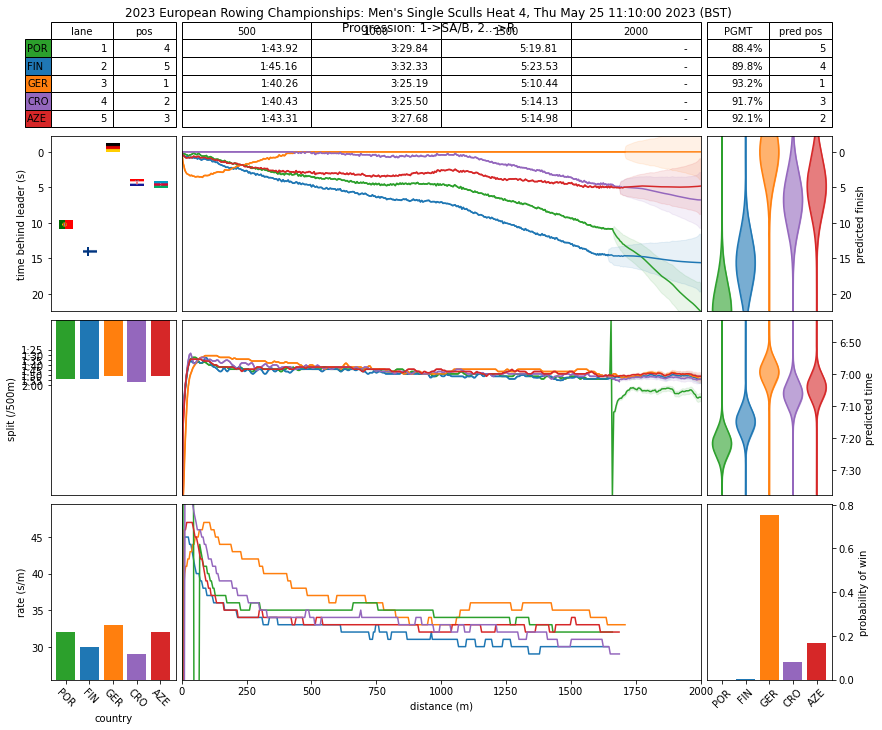

In [7]:
dash.update()
dash.fig

In [56]:
api.get_worldrowing_data(
    "livetracker", 'd9cbe932-f1c5-4506-a2c3-09179315ef11'#, cached=False
)['config']['lanes'][0]['live'][-1]

{'distanceOfLeader': 2000,
 'distanceOfLeaderFromFinish': 0,
 'id': 'd7543094-dbcf-44e5-9c0d-76a19f3524ea',
 'raceBoatTracker': {'currentPosition': 1,
  'distanceFromLeader': 0,
  'distanceTravelled': 2000,
  'id': '7297f992-7635-4e04-b0c9-f2566751639b',
  'kilometrePersSecond': None,
  'metrePerSecond': 3.7,
  'raceBoatId': '9fbe6546-2d2f-4401-ab4d-6e17a6fa7d0c',
  'raceTrackerId': 'd7543094-dbcf-44e5-9c0d-76a19f3524ea',
  'startPosition': 1,
  'strokeRate': 26},
 'raceId': 'd9cbe932-f1c5-4506-a2c3-09179315ef11',
 'trackCount': 877}

In [57]:
api.cached_request_worldrowing_data.cache_info()

CacheInfo(hits=1, misses=1, maxsize=128, currsize=1)

In [42]:
tracker = livetracker.RaceTracker(api.get_live_race().name)
tracker.update_livedata()
tracker.live_data

INFO:world_rowing.api:loaded most recent competition: 2023 European Rowing Championships


distanceTravelled                               metrePerSecond            \
boat               LTU   SWE   NOR   ESP   HUN   BEL            LTU  SWE  NOR   
0                    0     0     1     1     0     0            0.5  1.1  0.5   
1                    3     3     5     5     5     3            3.0  3.1  3.9   
2                    7     7     9     8     9     7            3.4  3.4  4.1   
3                   11    12    14    13    14    11            3.6  3.8  4.3   
4                   16    17    19    18    19    16            4.0  4.3  4.4   
..                 ...   ...   ...   ...   ...   ...            ...  ...  ...   
320               1546  1491  1511  1527  1508  1543            4.7  4.4  4.5   
321               1551  1496  1515  1531  1512  1547            4.6  4.4  4.5   
322               1555  1500  1519  1536  1517  1552            4.6  4.4  4.5   
323               1560  1505  1524  1541  1521  1557            4.6  4.4  4.5   
324               1565  1509  1528  1545  1526  1562            4.7  4.4  4.5   

           ...      PGMT                               timeFromLeader  \
boat  ESP  ...       HUN       LTU       NOR       SWE            LTU   
0     0.5  ...  0.000000  0.000000  0.097685  0.000000       0.000000   
1     3.3  ...  0.311100  0.186660  0.311100  0.186660       0.569993   
2     3.3  ...  0.415924  0.323497  0.415924  0.323497       0.543769   
3     3.8  ...  0.503852  0.395884  0.503852  0.431873       0.720607   
4     4.3  ...  0.562576  0.473748  0.562576  0.503358       0.701841   
..    ...  ...       ...       ...       ...       ...            ...   
320   4.8  ...  0.907576  0.930446  0.909382  0.897345       0.000000   
321   4.8  ...  0.907326  0.930729  0.909126  0.897724       0.000000   
322   4.7  ...  0.907570  0.930304  0.908767  0.897400       0.000000   
323   4.7  ...  0.907014  0.930271  0.908803  0.897473       0.000000   
324   4.7  ...  0.907267  0.930454  0.908456  0.897159       0.000000   

                                                         
boat        SWE       NOR       ESP       HUN       BEL  
0      0.000000  0.000000  0.000000  0.000000  0.000000  
1      0.569993  0.000000  0.000000  0.000000  0.569993  
2      0.543769  0.000000  0.271884  0.000000  0.543769  
3      0.480405  0.000000  0.240202  0.000000  0.720607  
4      0.467894  0.000000  0.233947  0.000000  0.701841  
..          ...       ...       ...       ...       ...  
320   11.888914  7.554072  4.082216  8.081693  0.655735  
321   11.789367  7.732951  4.189713  8.329148  0.760760  
322   11.863828  7.777236  4.179524  8.232647  0.741446  
323   11.849305  7.767349  4.094300  8.417179  0.637118  
324   11.892738  7.858272  4.205497  8.297043  0.591307  

[325 rows x 48 columns]

In [64]:
api.request_worldrowing_data(
    "livetracker", api.get_live_race().name,
)['data']['config']['lanes'][0]['currentPoint']

INFO:world_rowing.api:loaded most recent competition: 2023 World Rowing Cup I


{'distanceOfLeader': 582,
 'distanceOfLeaderFromFinish': 1418,
 'id': 'f7ea002e-510d-4561-b7b2-420fe6fe87a6',
 'raceBoatTracker': {'currentPosition': 4,
  'distanceFromLeader': 19,
  'distanceTravelled': 563,
  'id': '259507bf-7e21-45a9-910d-915db93ac39e',
  'kilometrePersSecond': None,
  'metrePerSecond': 4.4,
  'raceBoatId': '260bcb4b-4537-42bd-8049-eee78249767e',
  'raceTrackerId': 'f7ea002e-510d-4561-b7b2-420fe6fe87a6',
  'startPosition': 1,
  'strokeRate': 38},
 'raceId': '4363fafe-170f-4f2a-833d-0c228acdf4a6',
 'trackCount': 121}

In [22]:
debug

> /home/matthew/venv/rowing/lib/python3.8/site-packages/pandas/core/generic.py(5575)__getattr__()
   5573         ):
   5574             return self[name]
-> 5575         return object.__getattribute__(self, name)
   5576 
   5577     def __setattr__(self, name: str, value) -> None:

> /mnt/c/Users/matthew/Dropbox/PC/Documents/Source/rowing/rowing/world_rowing/livetracker.py(591)parse_intermediates_data()
    589         data, 'intermediates', 'distance.DisplayName'
    590     ).rename(columns={"raceConfig.value": "distance"})
--> 591     for c, times in intermediates.ResultTime.items():
    592         intermediates[("ResultTime", c)] = pd.to_timedelta(times)
    593 

Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []


In [81]:
next_races = api.get_next_races(10)
next_races

INFO:world_rowing.api:loaded most recent competition: 2023 World Rowing Cup I


,Date,DateString,DisplayName,IsStarted,Progression,RaceNr,Rescheduled,RescheduledFrom,RscCode,eventId,...,event.competition.StartDate,event.competition.Year,event.competition.competitionTypeId,event.competition.id,event.competition.venueId,event.competitionId,event.competitionTypeId,event.id,raceStatus.DisplayName,raceStatus.id
id,,,,,,,,,,,,,,,,,,,,,
dbe6fb35-45bf-4f4c-92a3-fc2ab6ad09ae,2023-05-06 07:42:00,2023-05-06 09:42:00+02:00,Men's Single Sculls Final C,None,,34,None,None,ROWMSCULL1------------FNL-000300--,114e7374-5a36-4be4-986c-28f7926be67d,...,2023-05-05,2023,651222cf-95cb-42cc-8207-7c76a57b3000,c37891fd-d633-404e-98fe-ec897a3a455e,9a012891-d84d-484a-9582-2d9c5ded7717,c37891fd-d633-404e-98fe-ec897a3a455e,651222cf-95cb-42cc-8207-7c76a57b3000,114e7374-5a36-4be4-986c-28f7926be67d,Official,182f6f15-8e78-41c3-95b3-8b006af2c6a1
638f3115-9263-49ea-93ca-f52195e03313,2023-05-06 07:54:00,2023-05-06 09:54:00+02:00,Men's Pair Repechage,None,"1-2->FA, 3..->FB",35,None,None,ROWMNOCOX2------------REP-000100--,78bcc71c-7ba5-497b-b815-66225a77bc4a,...,2023-05-05,2023,651222cf-95cb-42cc-8207-7c76a57b3000,c37891fd-d633-404e-98fe-ec897a3a455e,9a012891-d84d-484a-9582-2d9c5ded7717,c37891fd-d633-404e-98fe-ec897a3a455e,651222cf-95cb-42cc-8207-7c76a57b3000,78bcc71c-7ba5-497b-b815-66225a77bc4a,Official,182f6f15-8e78-41c3-95b3-8b006af2c6a1
8ce3e931-011e-4e3c-889e-3b3352496530,2023-05-06 08:00:00,2023-05-06 10:00:00+02:00,Men's Double Sculls Repechage R1,None,"1-2->FA, 3..->FB",36,0,None,ROWMSCULL2------------REP-000100--,24134037-9d55-4ee9-af9c-02128881a637,...,2023-05-05,2023,651222cf-95cb-42cc-8207-7c76a57b3000,c37891fd-d633-404e-98fe-ec897a3a455e,9a012891-d84d-484a-9582-2d9c5ded7717,c37891fd-d633-404e-98fe-ec897a3a455e,651222cf-95cb-42cc-8207-7c76a57b3000,24134037-9d55-4ee9-af9c-02128881a637,START LIST,88217faf-4116-4d5b-891b-6baccaf31b8f
89aad069-0fba-4fc7-8be4-9fb1ad271e7f,2023-05-06 08:06:00,2023-05-06 10:06:00+02:00,Men's Double Sculls Repechage 2,None,"1-2->FA, 3..->FB",37,None,None,ROWMSCULL2------------REP-000200--,24134037-9d55-4ee9-af9c-02128881a637,...,2023-05-05,2023,651222cf-95cb-42cc-8207-7c76a57b3000,c37891fd-d633-404e-98fe-ec897a3a455e,9a012891-d84d-484a-9582-2d9c5ded7717,c37891fd-d633-404e-98fe-ec897a3a455e,651222cf-95cb-42cc-8207-7c76a57b3000,24134037-9d55-4ee9-af9c-02128881a637,Unofficial,d168a581-658d-40ad-8537-e3a07470b20a
8625895c-c2ba-4508-adf8-9dd22570b2bb,2023-05-06 08:12:00,2023-05-06 10:12:00+02:00,Men's Four Repechage,None,1-4->FA,38,None,None,ROWMNOCOX4------------REP-000100--,a0591f31-8852-4c17-9c35-efe0a578fd5a,...,2023-05-05,2023,651222cf-95cb-42cc-8207-7c76a57b3000,c37891fd-d633-404e-98fe-ec897a3a455e,9a012891-d84d-484a-9582-2d9c5ded7717,c37891fd-d633-404e-98fe-ec897a3a455e,651222cf-95cb-42cc-8207-7c76a57b3000,a0591f31-8852-4c17-9c35-efe0a578fd5a,LIVE,9cbcca90-5b19-4d19-a3c9-50fce0293b97
2327aca3-0eea-48ce-904b-5fc87ac953f5,2023-05-06 08:18:00,2023-05-06 10:18:00+02:00,Women's Single Sculls Repechage,None,"1-2->FA, 3..->FB",39,None,None,ROWWSCULL1------------REP-000100--,970cfa70-69ac-4db0-8620-94acb7479547,...,2023-05-05,2023,651222cf-95cb-42cc-8207-7c76a57b3000,c37891fd-d633-404e-98fe-ec897a3a455e,9a012891-d84d-484a-9582-2d9c5ded7717,c37891fd-d633-404e-98fe-ec897a3a455e,651222cf-95cb-42cc-8207-7c76a57b3000,970cfa70-69ac-4db0-8620-94acb7479547,Scheduled,f89cc288-076b-4bb6-9776-96e66820e1b8
53d21717-97fd-4330-a502-d987dc448e69,2023-05-06 08:24:00,2023-05-06 10:24:00+02:00,Men's Single Sculls Semifinal A/B 1,None,"1-3->FA, 4..->FB",40,None,None,ROWMSCULL1------------SFNL000100--,114e7374-5a36-4be4-986c-28f7926be67d,...,2023-05-05,2023,651222cf-95cb-42cc-8207-7c76a57b3000,c37891fd-d633-404e-98fe-ec897a3a455e,9a012891-d84d-484a-9582-2d9c5ded7717,c37891fd-d633-404e-98fe-ec897a3a455e,651222cf-95cb-42cc-8207-7c76a57b3000,114e7374-5a36-4be4-986c-28f7926be67d,Scheduled,f89cc288-076b-4bb6-9776-96e66820e1b8
751325f1-bb35-420a-9eec-7ceed66fd2de,2023-05-06 08:30:00,2023-05-06 10:30:00+02:00,Men's Single Sculls Semifinal 

In [83]:
data = api.get_worldrowing_data("livetracker", next_races.index[4])

In [84]:
livetracker.parse_livetracker_raw_data(data, "live", "id")

live                                 distanceOfLeader                          \
boat                                              HKG   AUT   RSA  IND1  IND2   
id                                                                              
77a98bb5-3033-4144-aee0-05fe1ee6739a                0     0     0     0     0   
c6a4be49-9285-4d4a-b246-d3d1b0f09362                3     3     3     3     3   
a6419820-bcd0-4cc1-8ee5-ec46eb8f1559                6     6     6     6     6   
3c2acb35-58da-459f-8e5c-e57ab651f534               10    10    10    10    10   
5cccb4e9-0153-4cba-82c1-485de3fb2d5b               15    15    15    15    15   
...                                               ...   ...   ...   ...   ...   
8f7befd2-c4a9-4df4-89bd-055853e48dc9             1243  1243  1243  1243  1243   
a5f059ad-2bdb-47ba-879f-3bf25a4756fc             1248  1248  1248  1248  1248   
0cdc537f-5b10-4fbf-9fd6-1121ddf8e080             1253  1253  1253  1253  1253   
13e20251-cd91-42e1-bdd3-b4eafca8adda             1259  1259  1259  1259  1259   
3e09079b-f4d5-45cd-962a-a95af1f72075             1264  1264  1264  1264  1264   

live                                 distanceOfLeaderFromFinish              \
boat                                                        HKG   AUT   RSA   
id                                                                            
77a98bb5-3033-4144-aee0-05fe1ee6739a                       2000  2000  2000   
c6a4be49-9285-4d4a-b246-d3d1b0f09362                       1997  1997  1997   
a6419820-bcd0-4cc1-8ee5-ec46eb8f1559                       1994  1994  1994   
3c2acb35-58da-459f-8e5c-e57ab651f534                       1990  1990  1990   
5cccb4e9-0153-4cba-82c1-485de3fb2d5b                       1985  1985  1985   
...                                                         ...   ...   ...   
8f7befd2-c4a9-4df4-89bd-055853e48dc9                        757   757   757   
a5f059ad-2bdb-47ba-879f-3bf25a4756fc                        752   752   752   
0cdc537f-5b10-4fbf-9fd6-1121ddf8e080                        747   747   747   
13e20251-cd91-42e1-bdd3-b4eafca8adda                        741   741   741   
3e09079b-f4d5-45cd-962a-a95af1f72075                        736   736   736   

live                                              ...  \
boat                                  IND1  IND2  ...   
id                                                ...   
77a98bb5-3033-4144-aee0-05fe1ee6739a  2000  2000  ...   
c6a4be49-9285-4d4a-b246-d3d1b0f09362  1997  1997  ...   
a6419820-bcd0-4cc1-8ee5-ec46eb8f1559  1994  1994  ...   
3c2acb35-58da-459f-8e5c-e57ab651f534  1990  1990  ...   
5cccb4e9-0153-4cba-82c1-485de3fb2d5b  1985  1985  ...   
...                                    ...   ...  ...   
8f7befd2-c4a9-4df4-89bd-055853e48dc9   757   757  ...   
a5f059ad-2bdb-47ba-879f-3bf25a4756fc   752   752  ...   
0cdc537f-5b10-4fbf-9fd6-1121ddf8e080   747   747  ...   
13e20251-cd91-42e1-bdd3-b4eafca8adda   741   741  ...   
3e09079b-f4d5-45cd-962a-a95af1f72075   736   736  ...   

live                                 raceBoatTracker.startPosition          \
boat                                                           HKG AUT RSA   
id                                                                           
77a98bb5-3033-4144-aee0-05fe1ee6739a                             1   2   3   
c6a4be49-9285-4d4a-b246-d3d1b0f09362                             1   2   3   
a6419820-bcd0-4cc1-8ee5-ec46eb8f1559                             1   2   3   
3c2acb35-58da-459f-8e5c-e57ab651f534                             1   2   3   
5cccb4e9-0153-4cba-82c1-485de3fb2d5b                             1   2   3   
...                                                            ...  ..  ..   
8f7befd2-c4a9-4df4-89bd-055853e48dc9                             1   2   3   
a5f059ad-2bdb-47ba-879f-3bf25a4756fc                             1   2   3   
0cdc537f-5b10-4fbf-9fd6-1121ddf8e080                             1   2   3   
13e20251-cd91-42e1-bdd3

In [70]:
live_data = api.get_worldrowing_data(
    "livetracker", 
    next_races.index[2], 
    # "8ce3e931-011e-4e3c-889e-3b3352496530", 
    cached=False
)
live_data['config']['lanes'][0]['live'][-1]

{'distanceOfLeader': 2000,
 'distanceOfLeaderFromFinish': 0,
 'id': 'c7fcaf6e-4452-4df8-a52b-4683655db444',
 'raceBoatTracker': {'currentPosition': 5,
  'distanceFromLeader': 0,
  'distanceTravelled': 2000,
  'id': '0ff13ae9-d33f-4958-95d8-abef5be69cbe',
  'kilometrePersSecond': None,
  'metrePerSecond': 1.1,
  'raceBoatId': '6c21f7b1-f824-48a7-adbe-c910fc8ffeb4',
  'raceTrackerId': 'c7fcaf6e-4452-4df8-a52b-4683655db444',
  'startPosition': 1,
  'strokeRate': 26},
 'raceId': '638f3115-9263-49ea-93ca-f52195e03313',
 'trackCount': 456}

In [74]:
live_data['config']['race']

{'Date': '2023-05-06 07:54:00',
 'DateString': '2023-05-06T09:54:00+02:00',
 'DisplayName': "Men's Pair Repechage",
 'IsStarted': None,
 'Progression': '1-2->FA, 3..->FB',
 'RaceNr': '35',
 'Rescheduled': None,
 'RescheduledFrom': None,
 'RscCode': 'ROWMNOCOX2------------REP-000100--',
 'event': {'DisplayName': "Men's Pair",
  'RscCode': 'ROWMNOCOX2------------------------',
  'boatClassId': '02316e75-fdf2-4660-af40-48dda1867e1f',
  'competition': {'CompetitionCode': 'WCp1_2023_1',
   'DisplayName': '2023 World Rowing Cup I',
   'EndDate': '2023-05-07 00:00:00',
   'EntryDeadlineDate': None,
   'HasResults': 1,
   'IsFisa': 1,
   'StartDate': '2023-05-05 00:00:00',
   'Year': '2023',
   'competitionTypeId': '651222cf-95cb-42cc-8207-7c76a57b3000',
   'id': 'c37891fd-d633-404e-98fe-ec897a3a455e',
   'venueId': '9a012891-d84d-484a-9582-2d9c5ded7717'},
  'competitionId': 'c37891fd-d633-404e-98fe-ec897a3a455e',
  'competitionTypeId': '651222cf-95cb-42cc-8207-7c76a57b3000',
  'id': '78bcc71c

In [73]:
live_data['config']['race'].keys()

dict_keys(['Date', 'DateString', 'DisplayName', 'IsStarted', 'Progression', 'RaceNr', 'Rescheduled', 'RescheduledFrom', 'RscCode', 'event', 'eventId', 'genderId', 'id', 'racePhaseId', 'raceStatus', 'raceStatusId'])

In [58]:
live_data['config']['lanes'][0]['currentPoint']

{'distanceOfLeader': 1439,
 'distanceOfLeaderFromFinish': 561,
 'id': 'f17d1fc3-8299-4286-b999-f11daa31426e',
 'raceBoatTracker': {'currentPosition': 2,
  'distanceFromLeader': 20,
  'distanceTravelled': 1419,
  'id': '89965154-9898-4a35-ba25-c71b27ceefdb',
  'kilometrePersSecond': None,
  'metrePerSecond': 5.2,
  'raceBoatId': '19e0eaec-5ec8-452e-a89f-562285e6862f',
  'raceTrackerId': 'f17d1fc3-8299-4286-b999-f11daa31426e',
  'startPosition': 1,
  'strokeRate': 38},
 'raceId': '8ce3e931-011e-4e3c-889e-3b3352496530',
 'trackCount': 272}

In [49]:
live_data['config']['lanes'][0]["_finished"]

False

In [47]:
live_data['config']['lanes'][0].keys()

dict_keys(['DataTarget', 'DisplayName', 'InvalidMarkResult', 'Lane', 'Rank', 'Remark', 'ResultTime', 'WorldCupPoints', '_finished', 'boatId', 'country', 'countryId', 'currentPoint', 'id', 'intermediates', 'invalidMarkResultCode', 'live', 'raceBoatAthletes', 'raceId', 'worldBestTimeId'])

In [38]:
len(live_data['config']['lanes'][0]['live'])

341

INFO:world_rowing.dashboard:loading Men's Double Sculls Repechage 1, starting at 2023-05-06 09:00:00+01:00
/mnt/c/Users/matthew/Dropbox/PC/Documents/Source/rowing/rowing/world_rowing/dashboard.py:334: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self.fig.tight_layout()


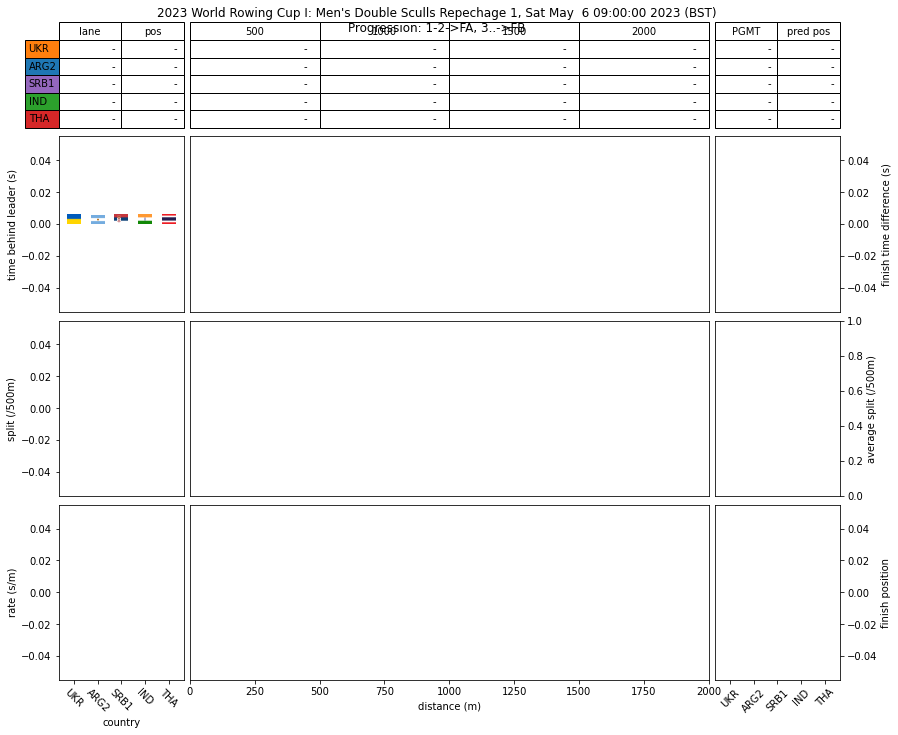

In [40]:
dashboard.Dashboard.from_race_id(
    "8ce3e931-011e-4e3c-889e-3b3352496530"
)

INFO:world_rowing.api:loaded most recent competition: 2023 World Rowing Cup I


,Date,DateString,DisplayName,IsStarted,Progression,RaceNr,Rescheduled,RescheduledFrom,RscCode,eventId,...,event.competition.StartDate,event.competition.Year,event.competition.competitionTypeId,event.competition.id,event.competition.venueId,event.competitionId,event.competitionTypeId,event.id,raceStatus.DisplayName,raceStatus.id
id,,,,,,,,,,,,,,,,,,,,,
d6abf074-2363-43e6-b4f2-2a7ab0852908,2023-05-06 07:30:00,2023-05-06 09:30:00+02:00,Men's Single Sculls Final E,None,,32,None,None,ROWMSCULL1------------FNL-000500--,114e7374-5a36-4be4-986c-28f7926be67d,...,2023-05-05,2023,651222cf-95cb-42cc-8207-7c76a57b3000,c37891fd-d633-404e-98fe-ec897a3a455e,9a012891-d84d-484a-9582-2d9c5ded7717,c37891fd-d633-404e-98fe-ec897a3a455e,651222cf-95cb-42cc-8207-7c76a57b3000,114e7374-5a36-4be4-986c-28f7926be67d,Cancelled,3e5b4b12-4610-4f75-8b23-5f878e8ffc54
91dd955e-8073-4143-9ddf-71a27366d5c9,2023-05-06 07:36:00,2023-05-06 09:36:00+02:00,Men's Single Sculls Final D,None,,33,None,None,ROWMSCULL1------------FNL-000400--,114e7374-5a36-4be4-986c-28f7926be67d,...,2023-05-05,2023,651222cf-95cb-42cc-8207-7c76a57b3000,c37891fd-d633-404e-98fe-ec897a3a455e,9a012891-d84d-484a-9582-2d9c5ded7717,c37891fd-d633-404e-98fe-ec897a3a455e,651222cf-95cb-42cc-8207-7c76a57b3000,114e7374-5a36-4be4-986c-28f7926be67d,Official,182f6f15-8e78-41c3-95b3-8b006af2c6a1
dbe6fb35-45bf-4f4c-92a3-fc2ab6ad09ae,2023-05-06 07:42:00,2023-05-06 09:42:00+02:00,Men's Single Sculls Final C,None,,34,None,None,ROWMSCULL1------------FNL-000300--,114e7374-5a36-4be4-986c-28f7926be67d,...,2023-05-05,2023,651222cf-95cb-42cc-8207-7c76a57b3000,c37891fd-d633-404e-98fe-ec897a3a455e,9a012891-d84d-484a-9582-2d9c5ded7717,c37891fd-d633-404e-98fe-ec897a3a455e,651222cf-95cb-42cc-8207-7c76a57b3000,114e7374-5a36-4be4-986c-28f7926be67d,Official,182f6f15-8e78-41c3-95b3-8b006af2c6a1
638f3115-9263-49ea-93ca-f52195e03313,2023-05-06 07:54:00,2023-05-06 09:54:00+02:00,Men's Pair Repechage,None,"1-2->FA, 3..->FB",35,None,None,ROWMNOCOX2------------REP-000100--,78bcc71c-7ba5-497b-b815-66225a77bc4a,...,2023-05-05,2023,651222cf-95cb-42cc-8207-7c76a57b3000,c37891fd-d633-404e-98fe-ec897a3a455e,9a012891-d84d-484a-9582-2d9c5ded7717,c37891fd-d633-404e-98fe-ec897a3a455e,651222cf-95cb-42cc-8207-7c76a57b3000,78bcc71c-7ba5-497b-b815-66225a77bc4a,LIVE,9cbcca90-5b19-4d19-a3c9-50fce0293b97
8ce3e931-011e-4e3c-889e-3b3352496530,2023-05-06 08:00:00,2023-05-06 10:00:00+02:00,Men's Double Sculls Repechage 1,None,"1-2->FA, 3..->FB",36,None,None,ROWMSCULL2------------REP-000100--,24134037-9d55-4ee9-af9c-02128881a637,...,2023-05-05,2023,651222cf-95cb-42cc-8207-7c76a57b3000,c37891fd-d633-404e-98fe-ec897a3a455e,9a012891-d84d-484a-9582-2d9c5ded7717,c37891fd-d633-404e-98fe-ec897a3a455e,651222cf-95cb-42cc-8207-7c76a57b3000,24134037-9d55-4ee9-af9c-02128881a637,Scheduled,f89cc288-076b-4bb6-9776-96e66820e1b8
89aad069-0fba-4fc7-8be4-9fb1ad271e7f,2023-05-06 08:06:00,2023-05-06 10:06:00+02:00,Men's Double Sculls Repechage 2,None,"1-2->FA, 3..->FB",37,None,None,ROWMSCULL2------------REP-000200--,24134037-9d55-4ee9-af9c-02128881a637,...,2023-05-05,2023,651222cf-95cb-42cc-8207-7c76a57b3000,c37891fd-d633-404e-98fe-ec897a3a455e,9a012891-d84d-484a-9582-2d9c5ded7717,c37891fd-d633-404e-98fe-ec897a3a455e,651222cf-95cb-42cc-8207-7c76a57b3000,24134037-9d55-4ee9-af9c-02128881a637,Scheduled,f89cc288-076b-4bb6-9776-96e66820e1b8
8625895c-c2ba-4508-adf8-9dd22570b2bb,2023-05-06 08:12:00,2023-05-06 10:12:00+02:00,Men's Four Repechage,None,1-4->FA,38,None,None,ROWMNOCOX4------------REP-000100--,a0591f31-8852-4c17-9c35-efe0a578fd5a,...,2023-05-05,2023,651222cf-95cb-42cc-8207-7c76a57b3000,c37891fd-d633-404e-98fe-ec897a3a455e,9a012891-d84d-484a-9582-2d9c5ded7717,c37891fd-d633-404e-98fe-ec897a3a455e,651222cf-95cb-42cc-8207-7c76a57b3000,a0591f31-8852-4c17-9c35-efe0a578fd5a,Scheduled,f89cc288-076b-4bb6-9776-96e66820e1b8
2327aca3-0eea-48ce-904b-5fc87ac953f5,2023-05-06 08:18:00,2023-05-06 10:18:00+02:00,Women's Single Sculls Repechage,None,"1-2->FA, 3..->FB",39,None,None,ROWWSCULL

In [14]:
api.get_last_race_started()

INFO:world_rowing.api:loaded most recent competition: 2023 World Rowing Cup I
INFO:world_rowing.api:loaded last race started: Men's Single Sculls Quarterfinal 4


Date                                                      2023-05-05 13:36:00
DateString                                          2023-05-05 15:36:00+02:00
DisplayName                                Men's Single Sculls Quarterfinal 4
IsStarted                                                                None
Progression                            1-3->SA/B, 4->FC, 5->FC or FD, 6..->FD
RaceNr                                                                     31
Rescheduled                                                              None
RescheduledFrom                                                          None
RscCode                                    ROWMSCULL1------------QFNL000400--
eventId                                  114e7374-5a36-4be4-986c-28f7926be67d
genderId                                 5beae5a3-10e4-4d33-96e5-c1a9f612dd54
racePhaseId                              a0b6ffd8-92b8-427b-a667-ac2ff640031a
raceStatusId                             182f6f15-8e78-41c3-95b3

# Live tracking

Running the cell below will automatically update the graph with the livetracking data and predictions for the end of the race. 

INFO:world_rowing.api:loaded last race started: Men's Eight Final FA
INFO:world_rowing.dashboard:loading Men's Eight Final FA, starting at 2021-07-30 02:25:00+01:00
/mnt/c/Users/matthew/Dropbox/PC/Documents/Source/rowing/rowing/world_rowing/dashboard.py:334: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self.fig.tight_layout()


country    AUS   GBR   GER   NED  NZL   USA
0.31     11.59  1.09  0.96  3.32  0.0  2.11
6.69     11.59  1.09  0.96  3.32  0.0  2.11


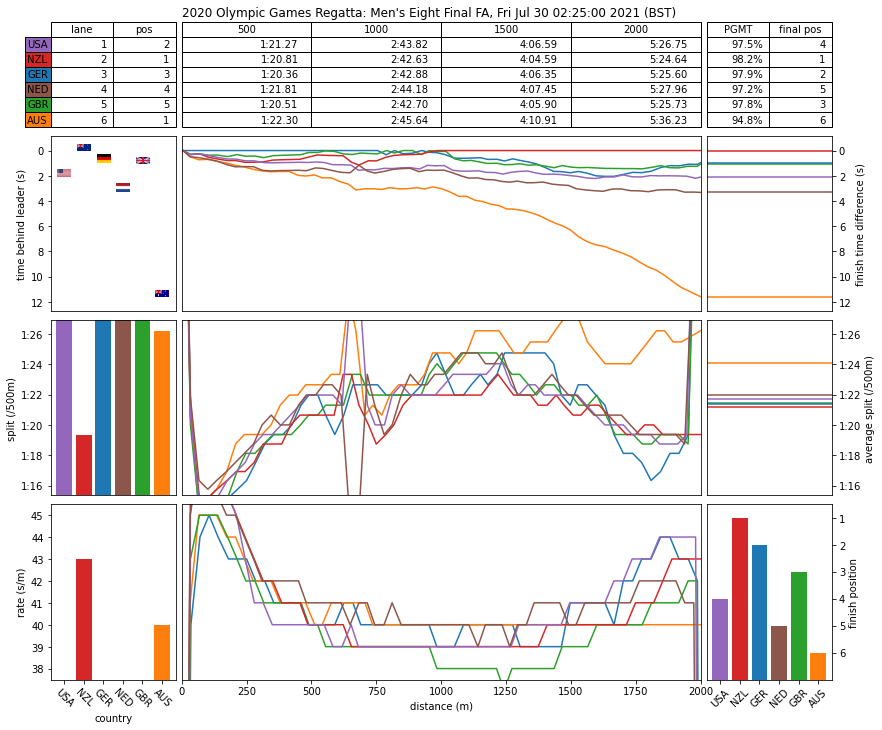

In [7]:
competition = api.get_competitions(2021).loc["e807bba5-6475-4f1a-9434-26704585bf19"]
dash = dashboard.Dashboard.load_last_race(competition=competition, figsize=(14, 10))
dash.update()

# Viewing livetracking data for previous races

You can view the livetracking data for previous races as well

In [5]:
races = api.get_competition_races(competition.name)
races.iloc[:10].DisplayName

id
820c8656-ce52-47ea-ba55-7234b354c7b1             Lightweight Women's Double Sculls Heat 1
bcdd5cae-1772-44da-a9a7-b8bd3786f8e7             Lightweight Women's Double Sculls Heat 2
8b324308-d581-4405-a91f-0db23b535910            Lightweight Women's Double Sculls Heat H3
f73c8215-2427-459f-959d-2dc252a02215        Lightweight Women's Double Sculls Repechage 1
842a3024-7ea3-4156-b5a4-99145e06ef18        Lightweight Women's Double Sculls Repechage 2
8c51cb1f-e33f-45fb-af26-6bfbc86d1605    Lightweight Women's Double Sculls Semifinal A/B 1
982a7e03-cd4a-4ba0-a8f7-6ecb31ff30d5    Lightweight Women's Double Sculls Semifinal A/B 2
6f99d474-34d7-4f6c-ba84-b1bab962472c            Lightweight Women's Double Sculls Final B
169414b8-d18f-4350-930a-bfac0531bddb            Lightweight Women's Double Sculls Final A
af877ca3-960e-49a5-a8fb-b20d70941a8c            Lightweight Women's Double Sculls Final C
Name: DisplayName, dtype: object

INFO:world_rowing.dashboard:loading Lightweight Women's Double Sculls Final A, starting at 2021-07-29 02:10:00+01:00


country   FRA  GBR  ITA   NED   ROU  USA
0.31     0.14  0.5  0.0  0.49  1.86  1.0
6.69     0.14  0.5  0.0  0.49  1.86  1.0


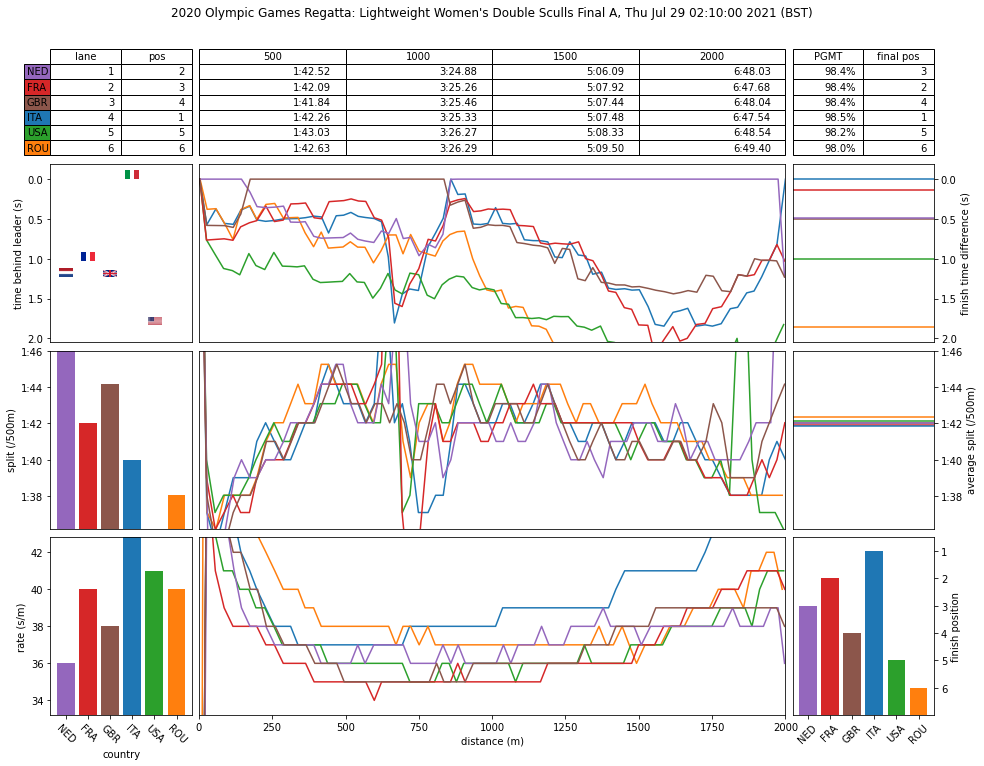

In [8]:
race = races.iloc[8]
dash = dashboard.Dashboard.from_race_id(
    race.name, figsize=(14, 10))
dash.update()

# Viewing competition PGMTs

In [9]:
comp_pgmts = api.get_competition_pgmts(competition.name)
group_boat_pgmts = comp_pgmts.groupby('Boat')
boat_pgmts = group_boat_pgmts\
    .first()\
    .sort_values('PGMT', ascending=False)
boat_pgmts

,PGMT,Time,WBT,Country,Rank,Lane,Date
Boat,,,,,,,
LM2x,1.000000,6:05.33,6:05.33,IRL,1,3,2021-07-28 02:30:00
LW2x,1.000000,6:41.36,6:41.36,ITA,1,4,2021-07-28 02:50:00
M4x,1.000000,5:32.03,5:32.03,NED,1,4,2021-07-28 01:30:00
W2-,1.000000,6:47.41,6:47.41,NZL,1,4,2021-07-28 03:30:00
W4x,1.000000,6:05.13,6:05.13,CHN,1,3,2021-07-28 01:50:00
W8+,1.000000,5:52.99,5:52.99,ROU,1,4,2021-07-28 03:40:00
M2x,0.998307,6:00.33,5:59.72,FRA,1,3,2021-07-28 00:30:00
W4-,0.997309,6:15.37,6:14.36,AUS,1,3,2021-07-28 00:50:00
W2x,0.990724,6:41.03,6:37.31,ROU,1,4,2021-07-28 00:18:00


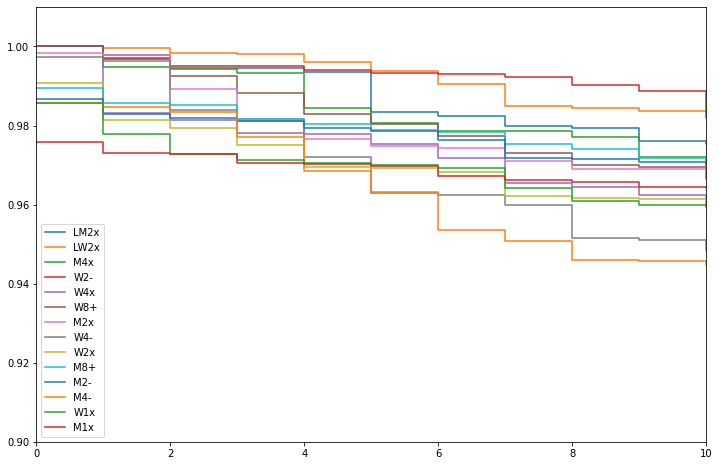

In [7]:
f, ax = plt.subplots(figsize=(12, 8))

for boat in boat_pgmts.index:
    pgmt = group_boat_pgmts.get_group(boat).PGMT.sort_values(ascending=False)
    ax.step(range(pgmt.size), pgmt.values, label=boat, where='post')
    
ax.set_xlim(0, 10)
ax.set_ylim(0.9, comp_pgmts.PGMT.max() + .01)
ax.legend();